In [48]:
#this is the code that is used to hide the cells of the project
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

The raw code for this IPython notebook is by default hidden for easy reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# Initialisation Cell
from __future__ import print_function, division
from IPython.display import display, HTML, Javascript
from matplotlib import pyplot as plt
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import random
import statsmodels as stats
import sys
import scipy 

%matplotlib inline

sns.set_context("talk")
sns.set_style("white");

#Stacked and Horizontal Slides
horizontal = Javascript("""this.element.addClass('horizontal');""")
stacked = Javascript("""this.element.removeClass('horizontal');""")
set_horizontal = lambda: display(horizontal)
set_stacked = lambda: display(stacked)

# Investigating the relationship of  factors that affect the growth of the Manufacturing GDP: A South African Perspective

## Abstract/Summary :


In the year of 2020, there has been an enforceable pandemic called COVID-19 that caused a global and economic shutdown with unprecedented consequences. With Gross domestic product (GDP) "a monetary measure of the market value of all the final goods and services produced in a specific time", being an indicator of countries prosperity it is essentially important to understand what variables impact the GDP of a country such as South Africa. 

The purpose of this project is to understand the factors that affect the growth of the Manufacturing GDP, the idea in this notebook is inspired from [Factors Affecting GDP (Manufacturing, Services, Industry): An Indian Perspective Dhiraj Jain, K. Sanal Nair and Vaishali Jain](https://www.scmspune.ac.in/chapter/Chapter%203.pdf). With a focus on South African context, the dependent variable will be is Manufacturing GDP and the additional variables not included in the Indian Perspective such as electricity availability, number of workers in the manufacturing sector and others. 

The methodology for selecting the best model in this project was decided between a backward and forward variable selection that was adjusted according to $R^2$. After hypothesis testing and feature engineering, the model  deemed best by having a p-value above 0.05 was the forward selection and it gave the following model :


$ Note: \beta_1  (Electricity) $ = $\beta_1 *(Electricity)$ 

$$
   \therefore{} ManufacturingGDP = \beta_0 + \beta_1  (Electricity) + \beta_2 (Debt)  
    + \beta_3 (Inflation) + \beta_4 (DifferenceElectricity)
    + \beta_5 (DifferenceExportImport)
$$

- $\beta_0$ - 1.342e+04
- $\beta_1$ - 1.1156
- $\beta_2$ - 6.761e-08
- $\beta_3$ - 2527.8429
- $\beta_4$ - 0.4380
- $\beta_5$ - 2.417e-07
- $R^2$ of `0.8290492420936914`, p-value of `0.9746141187734654` and test stat of ` 0.03215531211699297`

The result produced in the model above indicated that the countries exportation and importation served as an indicator of how much a country is self-sufficient and offers their services to other; in the case of South Africa a positive level can be assigned to the GDP since there is a sustainability factor that attracts other investors to the country. Incentives for investments that being local or foreign also played a great role in the model, leading to understand that the levels of debt and inflation motivates spending and capital circulation, and although this may be considered good or positive for GDP in a more general perspective, may be different in an in-depth view where this amount of capital may not circulate to some individuals either lower-income families or small businesses. On the other hand electricity production or difference in imported and exported electricity, in recent years has seen a decrease in production and maybe one of the factors to be considered important going forward given that the level of innovation in certain sectors depend on "Light for productivity". 

The main limitation found on the project was the data availability, given that some of the websites would not allow the public to download data from prior years to 2000 and in consequence some of the available data had quarters with missing values. Suggestion for future students is to acquire more data to provide new insights, test different modeling selection techniques and having actual quarters for some of the years not provided by the OECL. All in all from this model makes it understandable that if there is an increase in productivity and the services necessary in the world that being technology or any other, there is an increasing probability of learning from this experience and to navigate in the event of another pandemic.

<a id='part2'></a>

## 1. Introduction:

GDP (Gross domestic product) can be seen a strong metric that allows us to understand the economic health of a country and is a reflection of the total sum of the production of the different industries existent in a country. GDP is comprised of all purchase of goods and services that are produced by a specific country and the services used by local citizens, tourists, firms that being local of foreign, and lastly the governing bodies.

During the past 4 to 6 years, there have been periods where the country of South Africa has experienced Load shedding, that refers to a situation when the shutdown of electrical power in part or parts of a city or province are deliberately interrupted to meet the demand of the overall population because there is not sufficient electricity to meet the current demand. In consequence, to this deliberate electricity interruption, most sectors that contribute significantly to the GDP of South Africa that being manufacturing, retail, accommodation (finance and real estate), government and others are among the sectors that are affected by these recent events.

### 1.1 Importance of Manufacturing GDP

The change in of GDP puts forward the question of economic prosperity and growth, given that nearly every sector within that economy that being service providers and manufacturing sector relly in the financial health of the country. The manufacturing sector is responsible for providing work for one in every ten individuals in South Africa’s workforce, according to [Stats Sa](http://www.statssa.gov.za/?p=11890) (Statistics SA), that is to say, that, as also seen on the image below, the manufacturing sector in South Africa compared to the rest of the continent has a diversified list of sectors within itself that most of the workers in the different areas play a key role that contributes considerably to the overall GDP of the country.


<img src="../img/image2.png" alt="Where is the image ?" width="670"/>

With the understanding of the importance of Manufacturing GDP, after the Exploratory analysis phase, the main objective of this research will be to investigate :

- `What factors affect the South African Manufacturing GDP `

Subsequently, the other objectives will be to understand :

- `Does the variation in Export and Import of Goods affects the South African manufacturing GDP ?`
- `Will the decreasing number of employees affect South Africa manufacturing industry?  `
- `Is electricity availability affecting the South African manufacturing GDP ? `



### 1.2 Variable selection

To answer the question above the variables used as the factors that influence Manufacturing Gdp are as follow :


-  `Available electricity in South Africa (Gigawatts)` - This variable has the amound of electricity in Gigawatts that is available for consumption in South Africa.
-  `Exported Goods (Rands)` - This variable stores the amount of capital received by the exported goods manufactured in South Africa.
-  `Imported Goods (Rands)` - This variable stores the amount of capital spent on the imported goods manufactured outside of South Africa.
-  `Producer price index (Percentage)` - in manufacturing measure the rate of change in prices of products sold as they leave the producer.

-  `Number of employees in manufacturing` - This variable refers to the number of workers that are present in the manufacturing sector until the availability of the data.
-  `Inflation (Percentage)` - Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over some time ([Investopedia, Accessed 17 June 2020](https://www.investopedia.com/terms/i/inflation.asp)).

-  `External debt stocks (Rands)` - Total external debt is debt owed to nonresidents repayable in currency, goods, or services. Total external debt is the sum of public, publicly guaranteed, and private nonguaranteed long-term debt, use of IMF credit, and short-term debt in current U.S. dollars ([Indexmundi, Accessed 17 June 2020](https://www.indexmundi.com/facts/indicators/DT.DOD.DECT.CD)).

-   `Portfolio equity (Rands)` - Portfolio equity includes net inflows from equity securities other than those recorded as direct investment and including shares, stocks, depository receipts (Local or global), and direct purchases of shares in local stock markets by foreign investors ([Indexmundi, Accessed 17 June 2020](https://www.indexmundi.com/facts/indicators/BX.PEF.TOTL.CD.WD)).

-  `Difference between Exported and Imported Electricity in SA (Gigawatts)` - This variable stores the different of exported and imported goods, allows to understand the variation of sustainability of the manufacturing sector.

-  `Difference between Exported and Imported Goods in SA (Rands)` - This variable stores the difference of imported and exported electricity in South Africa, this allows to understand how the variation of these two variables is presented.


According to [Factors Affecting GDP (Manufacturing, Services, Industry): An Indian Perspective Dhiraj Jain, K. Sanal Nair and Vaishali Jain](https://www.scmspune.ac.in/chapter/Chapter%203.pdf), most of the above variables can be considered for this study, primarily because the data is avaliable to the public and secondly most researchers in the past and present most likely have used these variables.  

The other sections present in this notebook will the following :
 - <a href='#part3'>Data Assessment</a>
 - <a href='#part4'>Data Wrangling </a>
 - <a href='#part5'>Exploratory Analyses </a>
 - <a href='#part6'>Model Fitting </a>
 - <a href='#part7'>Hyphotesis testing </a>
 - <a href='#part8'>Regression Plots </a>
 - <a href='#part9'>Residual Analysis </a>
 - <a href='#part10'>Conclusion </a>


<a id='part3'></a>

## 2. Data Assessment 

The Data Assessment section of the notebook is where most of the pre-processing for the data wrangling section is done. This section has the objective of understanding, analysing and interpreting the values of the raw data against the original publication, such that the resulting data has accurate measurements and is ready to be used for the sections going forward. 

The aspects of data quality of the datasets are used to understand how a data is composed, and if the data has plausible and acceptable characteristics. For this research they are as follows :

- Validity: The data does conform to a standard of normal data creation when selected in Xls or excel format.

- Accuracy: The data collected on websites such as Stats Sa and OECD are reliable and agree with the reality of what happened during the past years. The data presented in this project is similar to the downloaded file for Stats SA the only issue with OECD is the missing dates from 2016-2019.

- Completeness: Not all records are present in the OECD dataset that was provided to the public but for the Stats SA the data retrieved was complete.

- Consistency: All the data provided by Stats SA are in logical agreement but the data coming from OECD is limited to the amount of data provided to the public. 

- Uniformity: All the units used across the dataset are the same and for the OECD there is a need to convert the value to Rands since the data provided is in US Dollars. 

### 2.1 Locating the data

Before starting the data assessment process it is important to understand the size of our dataset, such that appropriate rows and columns are selected with the correct information for our data wrangling section. The code below will give the reader the information of where and when the data was downloaded, an in-depth description of the data and data validation process. 

The first datasets presented bellow was downloaded on the 3rd of March 2020 form the following link, [Stats Sa time series data](http://www.statssa.gov.za/?page_id=1847), where the gdp1993 database contains quarterly values collected from 1993 to 2019, while on the available electricity database we have two dataset files elecavaliable1990 and elecavaliable2000 that were also downloaded on the Stats SA website.

In [3]:
#primary data

#gdp data
gdp1993 = pd.read_excel('../Dataset/GDP/Excel table from 1993.xls')
print('Data downloaded from Stats Sa time series \n')
print('For the GDP dataset there are: ', gdp1993.shape[0],'rows and',gdp1993.shape[1],'columns')

#electricity data
elecavaliable1990 = pd.read_html('../Dataset/electwater/Excel table from 1990 to 1999.xls')[0]
print('For the first dataset of available electricity there are: ', elecavaliable1990.shape[0],'rows and',elecavaliable1990.shape[1],'columns')
elecavaliable2000 = pd.read_html('../Dataset/electwater/Excel table from 2000.xls')[0]
print('For the second dataset of available electricity there are: ', elecavaliable2000.shape[0],'rows and',elecavaliable2000.shape[1],'columns')

Data downloaded from Stats Sa time series 

For the GDP dataset there are:  91 rows and 116 columns
For the first dataset of available electricity there are:  23 rows and 131 columns
For the second dataset of available electricity there are:  23 rows and 252 columns


For the secondary data, there is PPI index coming from [Stats SA time series data](http://www.statssa.gov.za/?page_id=1847) and other datasets downloaded from  OECD such as:

- [OECD Inflation](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?end=2019&locations=ZA&name_desc=false&start=1993)
- [External debt stocks, public and publicly guaranteed](https://data.worldbank.org/indicator/DT.DOD.DPPG.CD?end=2018&locations=ZA&start=1993)
- [Exports of goods and services ](https://data.worldbank.org/indicator/NE.EXP.GNFS.CD?end=2018&locations=ZA&name_desc=false&start=1993)
- [OECD Portfolio equity](https://data.worldbank.org/indicator/BX.PEF.TOTL.CD.WD?end=2019&locations=ZA&start=1993)
- [Foreign direct investment](https://data.worldbank.org/indicator/BX.KLT.DINV.CD.WD?end=2019&locations=ZA&start=1993&view=chart)
- [OECD Employment Outlook](https://data.oecd.org/emp/employment-by-activity.htm#indicator-chart)
https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?end=2019&locations=ZA&start=1993

The data selected was in excel format and downloaded on the 9 of March 2020. 
In the event the above website is not working one can find the data by searching on google using the keywords bellow and select the websites with the name OECD :
- OECD Employment Outlook
- Employment by sector south Africa



In [4]:
# secondary data
print('Secondary data downloaded from OECD \n')
#ppi there was no avaliability of one dataset with all values but only partial data files
ppi1990 = pd.read_html('../Dataset/PPI/Producer Price Index 1990 to 1999.xls')[0]
ppi2000 = pd.read_html('../Dataset/PPI/Producer Price Index 2000.xls')[0]
ppi2012 = pd.read_html('../Dataset/PPI/Producer Price index 2012 to 2020.xls')[0]

print('This is the size of our data for ppi1990 is: ', ppi1990.shape[0],'rows and',ppi1990.shape[1],'columns')
print('This is the size of our data for ppi1990 is: ', ppi2000.shape[0],'rows and',ppi2000.shape[1],'columns')
print('This is the size of our data for ppi1990 is: ', ppi2012.shape[0],'rows and',ppi2012.shape[1],'columns')

#dataset number of manufacturing industry employees given by the world bank
emp = pd.read_csv('../Dataset/Manufacturing/DP_LIVE_23032020135514765.csv') 
print('For the number of employees dataset there are: ', emp.shape[0],'rows and',emp.shape[1],'columns')

#dataset with inflation given the world bank
inflation = pd.read_excel('../Dataset/Inflation/API_FP.CPI.TOTL.ZG_DS2_en_excel_v2_1121033.xls')
print('For the inflation dataset there are: ', inflation.shape[0],'rows and',inflation.shape[1],'columns')

#dataset with export of goods in dollars given the world bank
exportGoods = pd.read_excel('../Dataset/ImportandExport/API_NE.EXP.GNFS.CD_DS2_en_excel_v2_1121511_Export.xls')
print('For the exports of goods dataset there are: ', exportGoods.shape[0],'rows and',exportGoods.shape[1],'columns')

#dataset with import of goods in dollars given the world bank
importGoods = pd.read_excel('../Dataset/ImportandExport/API_NE.IMP.GNFS.CD_DS2_en_excel_v2_1121431_Import.xls')
print('For the import of goods dataset there are: ', importGoods.shape[0],'rows and',importGoods.shape[1],'columns')

#dataset with equity in dollars given the world bank
equity = pd.read_excel('../Dataset/Equity/API_BX.PEF.TOTL.CD.WD_DS2_en_excel_v2_1123848.xls')
print('For the equity dataset there are : ', equity.shape[0],'rows and',equity.shape[1],'columns')

#dataset with debt stocks in dollars given the world bank
debt = pd.read_excel('../Dataset/ExternalDebt/API_DT.DOD.DPPG.CD_DS2_en_excel_v2_1124584.xls')
print('For the debt dataset: ', debt.shape[0],'rows and',debt.shape[1],'columns')

#dataset with foreign investments in dollars given the world bank
investment = pd.read_excel('../Dataset/Foreigninvest/API_BX.KLT.DINV.CD.WD_DS2_en_excel_v2_1121568.xls')
print('For direct foreign investment dataset there are: ', debt.shape[0],'rows and',debt.shape[1],'columns')

Secondary data downloaded from OECD 

This is the size of our data for ppi1990 is:  650 rows and 128 columns
This is the size of our data for ppi1990 is:  650 rows and 164 columns
This is the size of our data for ppi1990 is:  81 rows and 105 columns
For the number of employees dataset there are:  3202 rows and 8 columns
For the inflation dataset there are:  267 rows and 64 columns
For the exports of goods dataset there are:  267 rows and 64 columns
For the import of goods dataset there are:  267 rows and 64 columns
For the equity dataset there are :  267 rows and 64 columns
For the debt dataset:  267 rows and 64 columns
For direct foreign investment dataset there are:  267 rows and 64 columns


### 2.2 Understanding the different data sources

After inspecting the columns and rows of the dataset it is important to know what information the different columns in our dataset present, since gdp1993, elecavaliable1990 and ppi1990 have the same data structure and organization the description of the columns will be slightly similar just that gbp1993 has GDP data, elecavaliable1990 has electricity availability data and ppi1990 has information about producer price index. The information presented in the columns are as follows :

- `H03` - Code for each sector in the data, similar to a primary key in a table
- `H01` - Code for the for the type of data present in the cell in this case GDP or available electricity
- `H02` - Description of the data being selected in this case Gross Domestic Product or electricity available for consumption
- `H04` - Represents the type of data that is available that being Quarterly data or Gross domestic earnings
- `H05` - This column description of the sectors that the data comes from either retail, manufacturing or transport
- `H15` - This cell tells us if the values we are retrieving are the current prices or the taxes paid by the sector given the description
- `H16` - Tells us if we are taking in the actual values or seasonally adjusted.
- `H17` - indicates if the values represented on the following columns QR011993-QR032019 are actual figures or percentage of change
- `H25` - Just indicates that the data being retrieved are quarterly values 

In [5]:
#Understanding the columns that are present in each dataframe
print("✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎GDP Columns✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎")
print(gdp1993.columns)

✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎GDP Columns✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎
Index(['H03', 'H01', 'H02', 'H04', 'H05', 'H15', 'H16', 'H17', 'H25',
       'QR011993',
       ...
       'QR022017', 'QR032017', 'QR042017', 'QR012018', 'QR022018', 'QR032018',
       'QR042018', 'QR012019', 'QR022019', 'QR032019'],
      dtype='object', length=116)


On the other hand for the the number of employees in the manufacturing sector and we have a different dataset structure with the following columns :

- `LOCATION` - this column has the countries available in the dataset
- `INDICATOR` - this column indicates for which industry the data is from
- `SUBJECT` - this column indicate what industry this data is from
- `MEASURE` - this column indicates that the column value unit is by thousands of people.
- `FREQUENCY` - indicates that the value is by quarters
- `TIME` - indicates the quarterly period of the data
- `Value` - indicates the number of employees 
- `Flag Codes` - not entirely sure since there is no data

In [6]:
#Understanding the columns that are present in each dataframe
print("✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎Employment Data Columns✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎")
print(emp.columns)

✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎Employment Data Columns✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎
Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')


Lastly the inflation data comes from a distict dataset, and an imperative note is the necessity to read the dataset starting from row 2 to be able to extract and read the column data from the correct position, with that said bellow are the columns :

- `Data Source` - this columns specifies the name of the countries present in the database
- `World Development Indicators` - this indicated the Country Code in database
- `Unnamed: 2` - this columns indicated the name and description of the data present in the database
- `Unnamed: 3` -this column has the indicator code of the data in the database
- `From Unnamed: 4 to Unnamed 64`- contains the percentage inflation in that year for a particular country

In [7]:
#Understanding the columns that are present in each dataframe
print("✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎Inflation Data Columns✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎")
print(inflation.columns)

✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎Inflation Data Columns✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎
Index(['Data Source', 'World Development Indicators', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unn

<a id='part4'></a>

## 3. Data Wrangling :

The start of the data wrangling can now begin after understanding all the variables and databases that are present above. The purpose of this section is to structure the final dataset in our favour such that if two tables that are required to be combined, or in case a particular set of rows deleted or datatype of a column modified it is possible to accurately have the dataset created in such a way that it is not extremely difficult to make changes along the way of our notebook if changes are necessary. What is done in the wrangling section can be summaried in the following steps:
1. From the 1993gdp dataset retrieve values of the manufacturing GDP, electricity gas water GDP and retail GDP and select range of values from 1993 to 2019.
2. Join the two databases of electricity 1990 and electricity 2000 lastly only select rows only containing values for  available electricity
3. Join the two databases of electricity 1990 and electricity 2000 lastly only select rows only containing values for exported electricity
4. Join the two databases of electricity 1990 and electricity 2000 lastly only select rows only containing values for imported electricity
5. Join the three databases of PPI 1990, PPI 2000 and PPI 2012. 
6. From emp dataset retrieve the employees in the manufacturing sector in SA and fill in the missing values for the two-quarters of the last three years with the mean of available data. 
7. For the databases inflation, export goods, import goods, equity, debt, investment, locate values South Africa and convert from dollars to Rands.

Each building block for the final database is to be modified and presented in such a way that, each dataframe used will store only the necessary number of elements to be used in the project. In each of the dataframes bellow there are in the cells bellow there are comments of how the datasets was created that will allow the reader to reproduce this study in the event he wishes to pre process the data.

Dealing with missing data in this project involved filling values with the means and not taking into account certain rows. For the dataset with no quarterly values, the yearly values was taken and divided by 4, although this is not standard practice it was done given that data was not available for some of the datasets and to test the possible results that can be achieved.

`Note: One can simply repopulate the missing time series data with the last known date. With that said bellow is the datawrangling section`

In [8]:
#manufacturing GDP
ManufacturingGdp = gdp1993.loc[16]
ManufacturingGdp = ManufacturingGdp[9:]

#electricity gas water GDP
EGWGdp = gdp1993.loc[21]
EGWGdp = EGWGdp[9:]

#Wholesale And\nRetail Trade,\nHotels And\nRestaurants GDP
RetailGdp = gdp1993.loc[30]
RetailGdp = RetailGdp[9:]
print('The size of GDP1993 before Data Wrangling is: ', gdp1993.shape[1])
print('Number of datapoints in Manufacturing GDP after Data Wrangling:',ManufacturingGdp.shape[0])
print('Number of datapoints in Electricity GDP after Data Wrangling:',EGWGdp.shape[0])
print('Number of datapoints in Retail GDP after Data Wrangling:',RetailGdp.shape[0])

The size of GDP1993 before Data Wrangling is:  116
Number of datapoints in Manufacturing GDP after Data Wrangling: 107
Number of datapoints in Electricity GDP after Data Wrangling: 107
Number of datapoints in Retail GDP after Data Wrangling: 107


In [9]:
#had to separate from the cell above since it was crashing and at times not giving correct results
RealGdp = gdp1993.loc[64]
RealGdp = RealGdp[9:]
print('Number of datapoints in GDP after Data Wrangling:',RealGdp.shape[0])

Number of datapoints in GDP after Data Wrangling: 107


In [10]:
''' It was necessary to create quarterly data from scratch by selecting a range of dates to be equal to what 
we already have and in this case, months ranging from QR011993 - MO092019 are the ones that will be used. 
Note: if one does not want to create from scratch just replicate the most recent data or use moving average
'''
#transform avaliable electricity
elect = elecavaliable1990.loc[7]
elect = elect[47:]
elect = elect.values
elect = elect.reshape(28,3)
elect0 = np.sum(elect, axis = 1)
elect0

electgenerated = elecavaliable2000.loc[7]
electgenerated = electgenerated[11:-4]
elect = electgenerated.values
elect = elect.reshape(79,3)
elect = np.sum(elect, axis = 1)

availableSA = np.concatenate((elect0, elect), axis=0)
#making sure we have a consistent shape for all of our data values for the final dataset
print('Number of datapoints in avaliable electricity before Data Wrangling in 1990 dataset',elect0.shape[0])
print('Number of datapoints in avaliable electricity before Data Wrangling in 2000 dataset',elect.shape[0])
print('Number of datapoints in avaliable electricity after Data Wrangling :',availableSA.shape[0])

print('\n')
#transform imported electricity
elect = elecavaliable1990.loc[9]
elect = elect[47:]
elect = elect.values
elect = elect.reshape(28,3)
elect0 = np.sum(elect, axis = 1)
elect0

electgenerated = elecavaliable2000.loc[9]
electgenerated = electgenerated[11:-4]
elect = electgenerated.values
elect = elect.reshape(79,3)
elect = np.sum(elect, axis = 1)

importedtoSA = np.concatenate((elect0, elect), axis=0)
print('Number of datapoints in imported electricity before Data Wrangling in 1990 dataset',elect0.shape[0])
print('Number of datapoints in imported electricity before Data Wrangling in 2000 dataset',elect.shape[0])
print('Number of datapoints in imported electricity after Data Wrangling :',importedtoSA.shape[0])

print('\n')
#transform exported electricity
elect = elecavaliable1990.loc[11]
elect = elect[47:]
elect = elect.values
elect = elect.reshape(28,3)
elect0 = np.sum(elect, axis = 1)
elect0

electgenerated = elecavaliable2000.loc[11]
electgenerated = electgenerated[11:-4]
elect = electgenerated.values
elect = elect.reshape(79,3)
elect = np.sum(elect, axis = 1)

exportedbySA = np.concatenate((elect0, elect), axis=0)
#making sure we have a consistent shape for all of our data values for the final dataset
print('Number of datapoints in exported electricity before Data Wrangling in 1990 dataset',elect0.shape[0])
print('Number of datapoints in exported electricity before Data Wrangling in 2000 dataset',elect.shape[0])
print('Number of datapoints in exported electricity after Data Wrangling :',exportedbySA.shape[0])

Number of datapoints in avaliable electricity before Data Wrangling in 1990 dataset 28
Number of datapoints in avaliable electricity before Data Wrangling in 2000 dataset 79
Number of datapoints in avaliable electricity after Data Wrangling : 107


Number of datapoints in imported electricity before Data Wrangling in 1990 dataset 28
Number of datapoints in imported electricity before Data Wrangling in 2000 dataset 79
Number of datapoints in imported electricity after Data Wrangling : 107


Number of datapoints in exported electricity before Data Wrangling in 1990 dataset 28
Number of datapoints in exported electricity before Data Wrangling in 2000 dataset 79
Number of datapoints in exported electricity after Data Wrangling : 107


In [11]:
# ppi wrangling
ppi = ppi1990.loc[1]
ppi = ppi[44:]
ppi = ppi.values
ppi = ppi.astype(float)
ppi = ppi.reshape(28,3)
ppi0 = np.sum(ppi, axis = 1)

#here the ppi dataset goes until end of 2012 so for the next dataset we need to start counting at the end of 2012 
ppi = ppi2000.loc[1]
ppi = ppi[8:]
ppi = ppi.values
ppi = ppi.astype(float)
ppi = ppi.reshape(52,3)
ppi1 = np.sum(ppi, axis = 1)

ppi = ppi2012.loc[1]
ppi = ppi[20:-4]
ppi = ppi.values
ppi = ppi.astype(float)
ppi = ppi.reshape(27,3)
ppi2 = np.sum(ppi, axis = 1)

ppiSA = np.concatenate((ppi0, ppi1, ppi2), axis=0)
#making sure we have a consistent shape for all of our data values for the final dataset
print('Number of datapoints in PPI before Data Wrangling in 1990 dataset',ppi0.shape[0])
print('Number of datapoints in PPI before Data Wrangling in 2000 dataset',ppi1.shape[0])
print('Number of datapoints in PPI before Data Wrangling in 2012 dataset',ppi2.shape[0])
print('Number of datapoints in PPI after Data Wrangling:',ppiSA.shape[0])

Number of datapoints in PPI before Data Wrangling in 1990 dataset 28
Number of datapoints in PPI before Data Wrangling in 2000 dataset 52
Number of datapoints in PPI before Data Wrangling in 2012 dataset 27
Number of datapoints in PPI after Data Wrangling: 107


In [12]:
'''
retrieve the employee data. To deal with the missing data will use the means of the available data in those years, 
IN THIS CASE, FROM 2001-2007 WE ONLY HAVE Q1 AND Q3 all in all bellow what we did is one of the methods of dealing 
with missing values that is to fill in the tables with the mean of the available data since we had two available 
columns in the years of 2001 for example in this case  Q1 and Q3 we then get mean and substitute for that
particular year.
'''
empZAR = emp[emp['LOCATION'] == 'ZAF']
okay = empZAR[['TIME','Value']]
okay = okay[:-1]
okay['TIME'].unique()

new = okay[1:15]
new

rows = new['Value'].values


empReal = rows.astype(float)
empReal = empReal.reshape(7,2)
empReal = np.mean(empReal, axis = 1)
empReal

from itertools import chain, repeat

empRealvalues = list(chain.from_iterable(zip(*repeat(empReal, 4))))
empRealvalues


rows = okay[15:]
rows = rows['Value'].values
rows = rows.astype(float)


empRealSA = np.concatenate((empRealvalues, rows), axis=0)
empRealSA = np.around(empRealSA, decimals=2)
empRealSA_1 = empRealSA
#multiplying the number of employees by 1000 since the table stated that the value is measured in 
#thousands of people.

empRealSA = empRealSA_1 * 1000
print('Number of datapoints in number of employees dataset before Data wrangling :',okay.shape[0])
print('Number of datapoints in number of employees dataset after Data wrangling :',empRealSA.shape[0])
# the last dataset created has median values for years 2001 to 2007 and for the rest of the years we only need 
# values for the years until 2019 Q3, we do not need the 2019 Q4 

Number of datapoints in number of employees dataset before Data wrangling : 62
Number of datapoints in number of employees dataset after Data wrangling : 75


In [13]:
'''
In this project the goal is to work with values of quarters of the year, since we cannot extimate the quarter
values the approach on this project will involve taking the yearly value and divide by 4. 
Note: 1. This is not standard practice and will only be used for testing purpose
      2. The values were in dollars, thus they were multiplied by 14.30 to convert to rands.
''' 

#retrieving inflation values
inflationZar = inflation.loc[264]
inflationSAvalues = inflationZar[37:].values
RealinflationSAvalues = inflationSAvalues[:-1]
#in this piece of code we simply divide and repeat the values by 4
inflationSAReal = list(chain.from_iterable(zip(*repeat(inflationSAvalues/4, 4))))
inflationSA = np.asarray(inflationSAReal)
inflationSA = inflationSA[:-1]
print('Number of datapoints for inflation before Data Wrangling :',inflationSAvalues.shape[0])
print('Number of datapoints for inflation after Data Wrangling :',inflationSA.shape[0])

# since we need to convert from dollars to rands we will multiply the values in the array by 14.30 
#that is the value of exchange during the week of the 10th of january period near the release of the data.
exportZar = exportGoods.loc[264]
exportSA = exportZar[37:].values
exportSAvalues = exportSA*14.30


#retrieving export goods values
RealexportSAvalues = exportSAvalues[:-1]
#in this piece of code we simply divide and repeat the values by 4 to get quarterly values in each year
exportSAReal = list(chain.from_iterable(zip(*repeat(exportSAvalues/4, 4))))
exportSA = np.asarray(exportSAReal)
exportSA = exportSA[:-1]
print('\n')
print('Number of datapoints for export in goods before Data Wrangling :',exportSAvalues.shape[0])
print('Number of datapoints for export in goods after Data Wrangling :',exportSA.shape[0])

#retrieving import of goods values
importZar = importGoods.loc[264]
importSA = importZar[37:].values
importSAvalues = importSA*14.30
RealimportSAvalues = importSAvalues[:-1]
#in this piece of code we simply divide and repeat the values by 4 to get quarterly values in each year
importSAReal = list(chain.from_iterable(zip(*repeat(importSAvalues/4, 4))))
importSA = np.asarray(importSAReal)
importSA = importSA[:-1]
print('\n')
print('Number of datapoints for import in goods before Data Wrangling :',importSAvalues.shape[0])
print('Number of datapoints for import in goods after Data Wrangling  :',importSA.shape[0])

#retrieving debt values
debtZar = debt.loc[264]
debtSA = debtZar[37:].values
debtSAvalues = debtSA*14.30
RealdebtSAvalues = debtSAvalues[:-1]
#in this piece of code we simply divide and repeat the values by 4 to get quarterly values in each year
debtSAReal = list(chain.from_iterable(zip(*repeat(debtSAvalues/4, 4))))
debtSA = np.asarray(debtSAReal)
debtSA = debtSA[:-1]
print('\n')
print('Number of datapoints for debt before Data Wrangling :',debtSAvalues.shape[0])
print('Number of datapoints for debt after Data Wrangling :',debtSA.shape[0])

#retrieving equity values
equityZar = equity.loc[264]
equitySA = equityZar[37:].values
equitySAvalues = equitySA*14.30
RealequitySAvalues = equitySAvalues[:-1]
#in this piece of code we simply divide and repeat the values by 4 to get quarterly values in each year
equitySAReal = list(chain.from_iterable(zip(*repeat(equitySAvalues/4, 4))))
equitySA = np.asarray(equitySAReal)
equitySA = equitySA[:-1]
print('\n')
print('Number of datapoints for equity before Data Wrangling :',equitySAvalues.shape[0])
print('Number of datapoints for equity after Data Wrangling :',equitySA.shape[0])

#retrieving foreign investment values
investmentZar = investment.loc[264]
investmentSA = investmentZar[37:].values
investmentSAvalues = investmentSA*14.30
RealinvestmentSAvalues = investmentSAvalues[:-1]
#in this piece of code we simply divide and repeat the values by 4 to get quarterly values in each year
investmentSAReal = list(chain.from_iterable(zip(*repeat(investmentSAvalues/4, 4))))
investmentSA = np.asarray(investmentSAReal)
ForeigninvestmentSA = investmentSA[:-1]
print('\n')
print('Number of datapoints for foreign investments before Data Wrangling :',investmentSAvalues.shape[0])
print('Number of datapoints for foreign investments after Data Wrangling :',ForeigninvestmentSA.shape[0])

Number of datapoints for inflation before Data Wrangling : 27
Number of datapoints for inflation after Data Wrangling : 107


Number of datapoints for export in goods before Data Wrangling : 27
Number of datapoints for export in goods after Data Wrangling : 107


Number of datapoints for import in goods before Data Wrangling : 27
Number of datapoints for import in goods after Data Wrangling  : 107


Number of datapoints for debt before Data Wrangling : 27
Number of datapoints for debt after Data Wrangling : 107


Number of datapoints for equity before Data Wrangling : 27
Number of datapoints for equity after Data Wrangling : 107


Number of datapoints for foreign investments before Data Wrangling : 27
Number of datapoints for foreign investments after Data Wrangling : 107


### 3.1 Dataframe creation for exploratory analyses

In [14]:
# Constructing the dataframe with real quarterly values for GDP 
dataexplore1 = pd.DataFrame(data={  'Manufacturing GDP':ManufacturingGdp.values,
                                    'Retail GDP':RetailGdp.values,  
                                    'Electricity Gas Water GDP':EGWGdp,
                                    'South Africa GDP':RealGdp
                         },
                        index=ManufacturingGdp.index, dtype=np.float64)

In [15]:
dataexplore1.tail()

,Manufacturing GDP,Retail GDP,Electricity Gas Water GDP,South Africa GDP
QR032018,99252.1,160336.3,16824.0,1246351.2
QR042018,101985.7,183626.0,17070.0,1260494.8
QR012019,90814.2,159873.1,15390.5,1204105.8
QR022019,95849.7,164945.2,16355.7,1262542.6
QR032019,97889.9,168183.3,16425.7,1293133.0


In [16]:
# Constructing the dataframe with real yearly values for macro economic variables 

'''Note: the variables (empRealSA,ppiSA and availableSA) are here to help create the pie chart later on. 
         These 3 variables do not have 1993 data points avaliable, thus will only be used only for the pie chart.
         The trick to be used is to skip one year and see how the percentage varied after 1994.'''
a = empRealSA.reshape(-1, 3).sum(1)
a1 = np.pad(a, (1, 0), 'constant')

b = ppiSA[29:-3].reshape(-1, 3).sum(1)
b1 = np.pad(b, (1, 0), 'constant')

c = availableSA[29:-3].reshape(-1, 3).sum(1)
c1 = np.pad(c, (1, 0), 'constant')

dataexplore2 = pd.DataFrame(index=['1993', '1994' , '1995' ,'1996' , '1997','1998',
                         '1999', '2000' , '2001' ,'2002' , '2003','2004',
                         '2005', '2006' , '2007' ,'2008' , '2009','2010',
                         '2011', '2012' , '2013' ,'2014' , '2015','2016',
                         '2017', '2018'
                        ], 
                  data={'Inflation':RealinflationSAvalues,
                        'Export':RealexportSAvalues,
                        'Import':RealimportSAvalues,
                        'Debt':RealdebtSAvalues,
                        'Equity':RealequitySAvalues,
                        'Foreign Investments':RealinvestmentSAvalues,
                        'Employees in Manufacturing':a1,
                        'PPI (Producer price index)':b1,
                        'Available Electricity in SA': c1,
                        
                       })

In [17]:
dataexplore2.tail()

,Inflation,Export,Import,Debt,Equity,Foreign Investments,Employees in Manufacturing,PPI (Producer price index),Available Electricity in SA
2014,6.13602,1.57908e+12,1.65421e+12,8.17066e+11,1.33531e+11,8.28207e+10,5039360.0,795.1,173308
2015,4.50921,1.36954e+12,1.42909e+12,8.26368e+11,1.21537e+11,2.17523e+10,5316510.0,857.4,172037
2016,6.5946,1.29599e+12,1.2738e+12,8.89388e+11,2.34475e+10,3.16789e+10,5388660.0,902.0,170740
2017,5.18108,1.48098e+12,1.41692e+12,1.16676e+12,1.08512e+11,2.94377e+10,5228840.0,911.0,171681
2018,4.50458,1.57507e+12,1.55696e+12,1.10151e+12,4.21237e+10,7.96433e+10,5329370.0,924.9,175562


### 3.2  Dataframe creation for hyphotesis testing
 
This dataset will be used as basis for the second part of this notebook Model fitting and the section on interpretation of the correlation matrix. The dataset created bellow, which has values of interest, will enable us to group the columns that are necessary to accurately create our models going forward and these will be the main variables of the project. The bellow desired dataset comprises of the following variables:

- Manufacturing GDP (Rands)
- Available electricity in South Africa (Gigawatts)
- Exported Goods (Rands)
- Imported Goods (Rands)
- Producer price index (Percentage)
- Number of employees in manufacturing (actual value)
- Inflation (Percentage)
- Debt (Rands)
- Equity (Rands)
- Difference between Exported and Imported Electricity in SA (Gigawatts)
- Difference between Exported and Imported Goods in SA (Rands)
- Foreign Direct investments

#### 3.2.1 Construction of desired dataframe

Constructing the data frame with quarterly values of all of the variables, the reason we are starting at the 29th element and not accounting for the last 3 is that there is an inconsistency in the dates between the last dataset coming from the OLED dataset and the Stats Sa and unfortunately there is also missing data. The reason for choosing the OLED dataset is primarily because of the content of the dataset since it would be beneficial in the coming years to understand how having a low workforce in the manufacturing sectors would affect our model when testing the second part of the project selection of variables based on Gonese, Dorcas & Hompashe, Dumisani & Sibanda, Kin. (2019).

In [18]:
data = pd.DataFrame(data={'Manufacturing GDP':ManufacturingGdp[29:-3].values,
                        'Available Electricity in SA':availableSA[29:-3], 
                        'PPI (Producer price index)':ppiSA[29:-3],  
                        'Employees in Manufacturing':empRealSA,
                        'Inflation':inflationSA[29:-3],
                        'Export Goods':exportSA[29:-3],
                        'Import Goods':importSA[29:-3],  
                        'Debt':debtSA[29:-3],
                        'Equity':equitySA[29:-3],
                        'Investment':ForeigninvestmentSA[29:-3],
                        '(Exported - Imported) Electricity in SA':exportedbySA[29:-3] - importedtoSA[29:-3], 
                        '(Exported - Imported) Goods in SA':exportSA[29:-3] - importSA[29:-3]
                         },
                        index=ManufacturingGdp[29:-3].index, dtype=np.float64)

In [19]:
#first 5 rows of our data
data.head()

,Manufacturing GDP,Available Electricity in SA,PPI (Producer price index),Employees in Manufacturing,Inflation,Export Goods,Import Goods,Debt,Equity,Investment,(Exported - Imported) Electricity in SA,(Exported - Imported) Goods in SA
QR022000,68957.3,49281.0,300.2,1791000.0,1.334738,1.323973e+11,1.183576e+11,3.248862e+10,1.490290e+10,3.463572e+09,515.0,1.403969e+10
QR032000,73175.8,51153.0,299.3,1791000.0,1.334738,1.323973e+11,1.183576e+11,3.248862e+10,1.490290e+10,3.463572e+09,-360.0,1.403969e+10
QR042000,75023.0,48265.0,306.0,1791000.0,1.334738,1.323973e+11,1.183576e+11,3.248862e+10,1.490290e+10,3.463572e+09,-211.0,1.403969e+10
QR012001,70866.6,47255.0,314.4,1791000.0,1.425476,1.276086e+11,1.104578e+11,2.838911e+10,-3.439887e+09,2.599148e+10,-138.0,1.715080e+10
QR022001,72291.9,49232.0,321.1,1835500.0,1.425476,1.276086e+11,1.104578e+11,2.838911e+10,-3.439887e+09,2.599148e+10,-733.0,1.715080e+10


<a id='part5'></a>

## 4. Exploratory Analyses

This section of the notebook will focus on understanding the exploration of the finalized dataset of the previous section Data wrangling. Firstly by visualizing the GDP of certain sector giving the time avaliable on the data and secondly the macro economic indicators as suggested by the previous study done in the indian perspective.

### 4.1 Understading South Africa GDP over time 

The reason for the bellow plots is to understand if the different industries in South Africa were profitable over the years and according to the plots, it shows us that the different industries that influence the GDP such as manufacturing, retail, and electricity gas and water had a positive trend along the years of 1993 - 2019. 

From the plots bellow there is an undersranding that the Retail industry has had greatest grow potential over the years, followed by the manufacturing sectors that despite the continuous growth it saw a rapid decrease in prices in the years of 1998 and 2008 compared to other industries and is the industry that seems to suffer the most in the times of crises. The rapid decrease in prices during the years of 1996 to 1998 and 2008 can be due to the financial crises that the world suffered during those times, and that is the reason why the second plot was created to accurately tell the year that the rapid decrease occurred. 

`Since the focus of this project is to study the factors that affect the growth of the Manufacturing GDP there is a necessity of examining the performance over time.`

#### 4.1.1 Plot of Retail GDP, Total SA GDP, Electricity production and Manufacturing GDP earnings over time

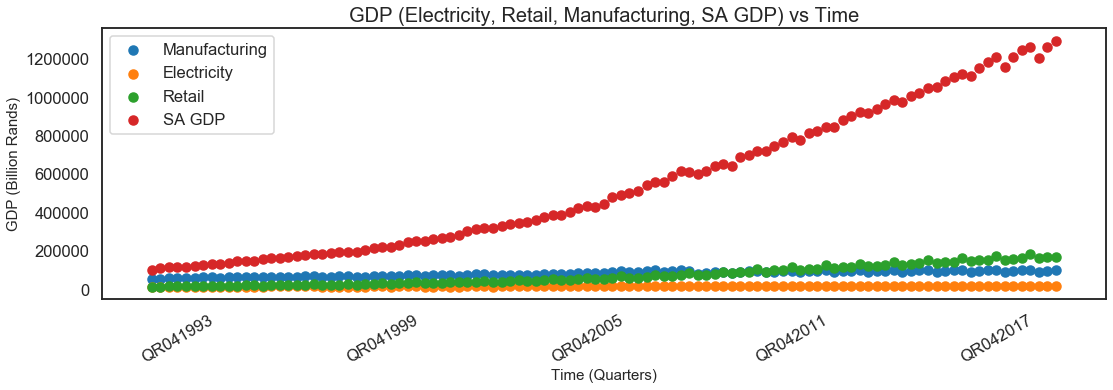

1. Electricity Gas Water GDP with Highest being 180 Million Rands, the mean 154 Million Rands and the minimum 114   Million Rands.

2. Retail GDP with highest being 183 Million Rands, the mean 72 Million Rands and the minimum 13 Million Rands.

3 South Africa GDP with highest being 129 Billion Rands, the mean 55 Billion Rands and the minimum 10 Billion Rands.


In [20]:
# Scatter Plot of Retail GDP, Total SA GDP, Electricity production and Manufacturing GDP earnings 1993 - 2019

plt.figure(figsize=(18,5))
plt.scatter(dataexplore1.index.values.tolist(), dataexplore1['Manufacturing GDP'],label="Manufacturing")
plt.scatter(dataexplore1.index.values.tolist(), dataexplore1['Electricity Gas Water GDP'],label="Electricity")
plt.scatter(dataexplore1.index.values.tolist(), dataexplore1['Retail GDP'],label="Retail")
plt.scatter(dataexplore1.index.values.tolist(), dataexplore1['South Africa GDP'],label="SA GDP")
plt.legend(loc="upper left")

x_points = np.array(dataexplore1.index.values.tolist())
x_marks = np.arange(3,123,24)
plt.xticks(x_points[x_marks],rotation=30)

plt.xlabel('Time (Quarters)',fontsize=15)
plt.ylabel('GDP (Billion Rands)',fontsize=15)
plt.title('GDP (Electricity, Retail, Manufacturing, SA GDP) vs Time', fontsize=20);
plt.show()

print('1. Electricity Gas Water GDP with Highest being 180',# np.round(dataexplore1['Electricity Gas Water GDP'].max()),
      'Million Rands, the mean 154',#np.round(dataexplore1['Electricity Gas Water GDP'].mean()),
      'Million Rands and the minimum 114',#np.round(dataexplore1['Electricity Gas Water GDP'].min()),
      '  Million Rands.')

print('\n2. Retail GDP with highest being 183',#np.round(dataexplore1['Retail GDP'].max()),
      'Million Rands, the mean 72',#np.round(dataexplore1['Retail GDP'].mean()),
      'Million Rands and the minimum 13',#np.round(dataexplore1['Retail GDP'].min()),
      'Million Rands.')

print('\n3 South Africa GDP with highest being 129',#np.round(dataexplore1['South Africa GDP'].max()),
      'Billion Rands, the mean 55',#np.round(dataexplore1['South Africa GDP'].mean()),
      'Billion Rands and the minimum 10',#np.round(dataexplore1['South Africa GDP'].min()),
      'Billion Rands.')

#### 4.1.2 Plot of Manufacturing GDP earnings over time

The plot below is to understand accurately the variation in the different years in the manufacturing industry as depicted in the above explanation although there was an increase in the manufacturing GDP over the years it is necessary to understand how the industry that we want to study performs over time given any market condition.

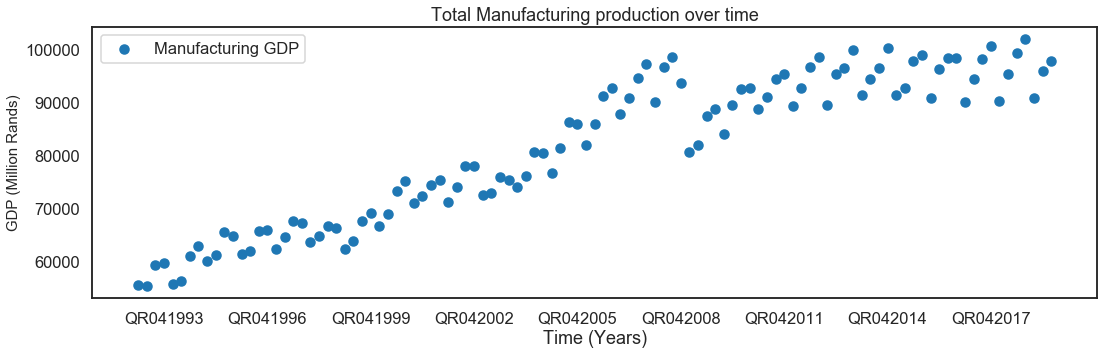

The Highest being 101 Million Rands, the mean 81 Million Rands and minimum 55 Million Rands.


In [21]:
# Scatter Plot of Manufacturing GDP earnings 1993 - 2019
plt.figure(figsize=(18,5))

plt.scatter(dataexplore1.index.values.tolist(),dataexplore1['Manufacturing GDP'],label="Manufacturing GDP")
plt.legend(loc="upper left")

x_points = np.array(dataexplore1.index.values.tolist())

x_marks = np.arange(3,100,12)

plt.xticks(x_points[x_marks])

plt.xlabel('Time (Years)')
plt.ylabel('GDP (Million Rands)',fontsize=15)
plt.title('Total Manufacturing production over time');
plt.show();

curr1 = dataexplore1['Manufacturing GDP'].max()
curr2 = dataexplore1['Manufacturing GDP'].mean()
prev = dataexplore1['Manufacturing GDP'].min()


change1 = np.round(( curr1 - curr2 )/curr2 * 100,0)
change2 = np.round(( curr2 - prev )/prev * 100,0)

print('The Highest being 101',#,np.round(dataexplore1['Manufacturing GDP'].max(),2),
      'Million Rands, the mean 81',#,np.round(dataexplore1['Manufacturing GDP'].mean(),2),
      'Million Rands and minimum 55',#,np.round(dataexplore1['Manufacturing GDP'].min(),2),
      'Million Rands.')

### 4.2 Understanding Marco economic variables over time

In this section of the exploratory analyses understanding of the levels of the other variables such as Inflation, Foreign direct investment, external debt stocks publicly guaranteed, and export and import of goods will be done in this section.

#### 4.2.1 Plot of inflation over time

From the plot bellow of inflation over time it is possible to understand that the inflation since 2016 has been in decline, leading to understanding that there are incentives for capital circulation. On the other hand, the exportation and importation levels in recent years reached almost similar levels just a slight variation between the two, this allows to consider that South Africa can be a sustainable country and able provide the manufacturing services to other countries.

Lower inflaction such as the one achieved in 2004 of -1%, signifies that the country has entered temporary lower growth period and is trying to regain confidence in the economy ([Monetary Developments,2012](https://www.imf.org/external/pubs/nft/2006/soafrica/eng/pasoafr/sach12.pdf)).  

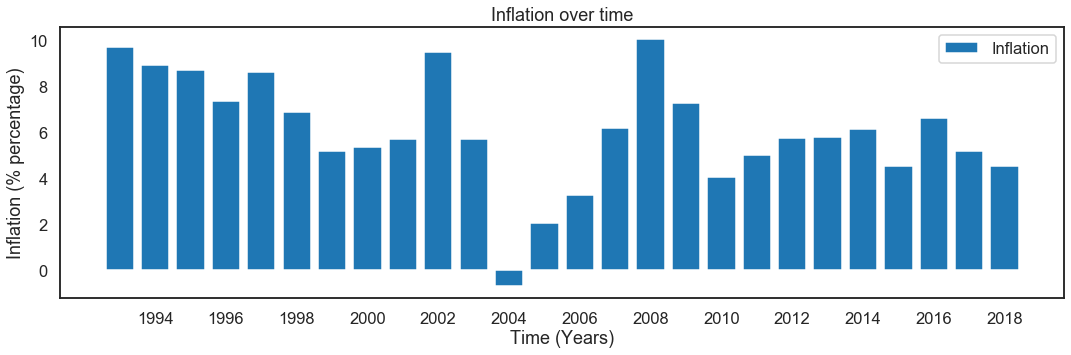

The highest being 10.06 %, the mean 6.0 % and minimum -1.0 %.


In [22]:
# Bar Plot of inflation 1993 - 2018
plt.figure(figsize=(18,5))

plt.bar(dataexplore2.index.values.tolist(),dataexplore2['Inflation'],label="Inflation")

x_points = np.array(dataexplore2.index.values.tolist())

x_marks = np.arange(1,27,2)

plt.xticks(x_points[x_marks])
plt.xlabel('Time (Years)')
plt.ylabel('Inflation (% percentage)')
plt.title('Inflation over time')
plt.legend(loc="upper right")
plt.show();

print('The highest being',np.round(dataexplore2['Inflation'].max(),2),
      '%, the mean',np.round(dataexplore2['Inflation'].mean()),
      '% and minimum',np.round(dataexplore2['Inflation'].min()),
      '%.')

#### 4.2.2 Plot of debt , export and import over time

External debt after 2008 has seen a surge, with the highest value being 1.1 Trillion rands in 2017. On the other hand for import of Goods, it saw increase since 2003 with a slight decline in 2008, where 1.8 Trillion Rands was the highest point. For export of Goods similar to the import it saw growth since 2003 where the highest point was 1.8 Trillion Rands, the average 1 Trillion Rands and decline in 2008 because of the financial crisis. 


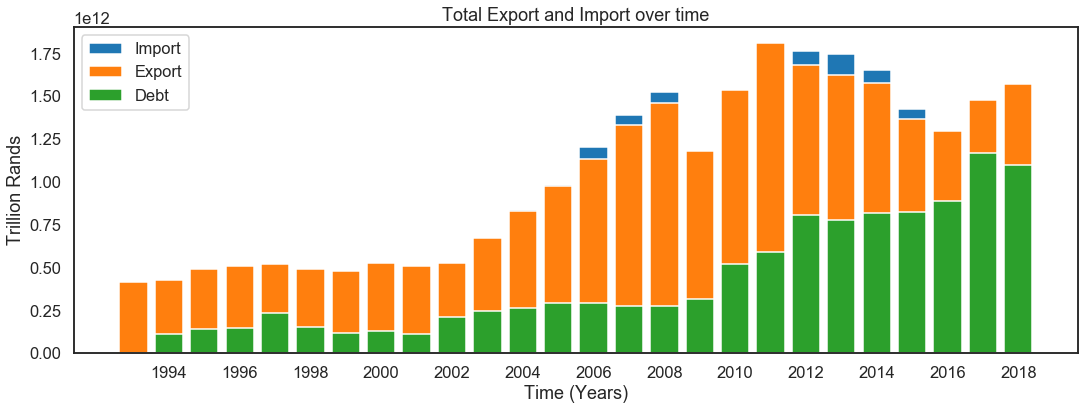

1. Imported goods with highest being 1.7 Trilion Rands, the mean 1 Trilion Rands and minimum 332 Billion Rands.

2. Export goods with highest being 1.8 Trilion Rands, the mean 1 Trilion Rands and minimum 419 Billion Rands.

3. Debt with highest being 1.1 Trilion Rands, the mean 416 Billion Rands and minimum 111 Billion Rands (111 is the second min amount included in the data).


In [23]:
# Bar Plot of debt, export and import 1993 - 2018
plt.figure(figsize=(18,6))

plt.bar(dataexplore2.index.values.tolist(),dataexplore2['Import'],label="Import")
plt.bar(dataexplore2.index.values.tolist(),dataexplore2['Export'],label="Export")                           
plt.bar(dataexplore2.index.values.tolist(),dataexplore2['Debt'],label="Debt")
plt.legend(loc="upper left")
x_points = np.array(dataexplore2.index.values.tolist())


x_marks = np.arange(1,27,2)

plt.xticks(x_points[x_marks])

plt.xlabel('Time (Years)')
plt.ylabel('Trillion Rands')
plt.title('Total Export and Import over time');
plt.show();

print('1. Imported goods','with highest being 1.7', #,np.round(dataexplore2['Import'].max()),
      'Trilion Rands, the mean 1', #,np.round(dataexplore2['Import'].mean()),
      'Trilion Rands and minimum 332', #,np.round(dataexplore2['Import'].min()),
      'Billion Rands.')

print('\n2. Export goods','with highest being 1.8',#np.round(dataexplore2['Export'].max()),
      'Trilion Rands, the mean 1',#np.round(dataexplore2['Export'].mean()),
      'Trilion Rands and minimum 419',#np.round(dataexplore2['Export'].min()),
      'Billion Rands.')

print('\n3. Debt','with highest being 1.1',#np.round(dataexplore2['Debt'].max()),
      'Trilion Rands, the mean 416',#np.round(dataexplore2['Debt'].mean()),
      'Billion Rands and minimum 111',#sorted(dataexplore2['Debt'])[1],
      'Billion Rands (111 is the second min amount included in the data).')

#### 4.2.3 Plot of PF (Portfolio Equity and Foregin Investments) over time

Lastly, foreign direct investments registered growth in the years of 1997, 2001, 2005 and 2008 where the highest point is 1.4 Trillion Rands and 161 Million Rands as the minimum amout. On the contrast for portfolio equity the prosperour years were 1998,1999, 2006. 2009 and 2014 where the highest was 2.1 Trillion Rands and 673 Billion Rands as loss in investments in 2008 due to the economic crisis.

The negative portfolio equity in the year of 2008 was negative that simply mean that the value of an asset fell below the outstanding balance on the loan used to purchase that asset. 

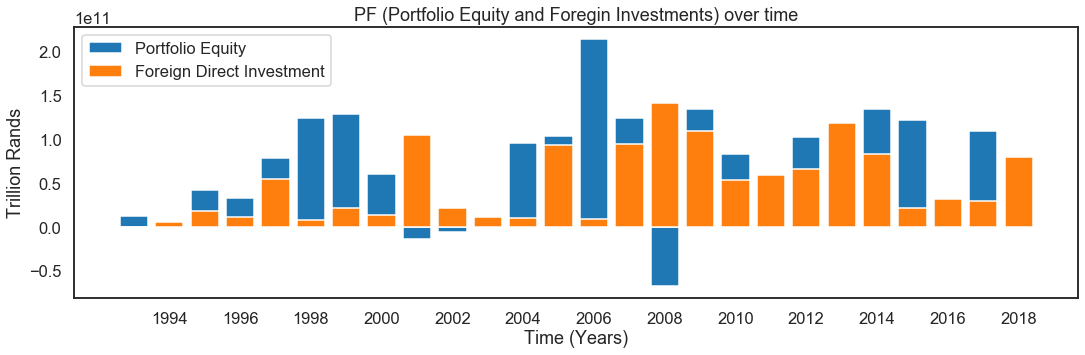

1. Portfolio Equity  with the highest being 2.1 Trilion Rands, the mean 689 Billion Rands and minimum -673 Billion Rands.

2 Foreign investments  with the highest being 1.4 Trilion Rands, the mean 487 Billion Rands and minimum 161 Million Rands.


In [24]:
# Bar Plot of Portfolio Equity and Foregin Investments 1993 - 2018

plt.figure(figsize=(18,5))
                            
plt.bar(dataexplore2.index.values.tolist(),dataexplore2['Equity'],label="Portfolio Equity")
plt.bar(dataexplore2.index.values.tolist(),dataexplore2['Foreign Investments'],label="Foreign Direct Investment")
plt.legend(loc="upper left")
x_points = np.array(dataexplore2.index.values.tolist())


x_marks = np.arange(1,26,2)

plt.xticks(x_points[x_marks])


plt.xlabel('Time (Years)')
plt.ylabel('Trillion Rands')
plt.title('PF (Portfolio Equity and Foregin Investments) over time');
plt.show();

print('1. Portfolio Equity',' with the highest being 2.1', #np.round(dataexplore2['Equity'].max()),
      'Trilion Rands, the mean 689', #np.round(dataexplore2['Equity'].mean()),
      'Billion Rands and minimum -673', #np.round(dataexplore2['Equity'].min()),
      'Billion Rands.')

print('\n2 Foreign investments',' with the highest being 1.4',#np.round(dataexplore2['Foreign Investments'].max()),
      'Trilion Rands, the mean 487',#np.round(dataexplore2['Foreign Investments'].mean()),
      'Billion Rands and minimum 161',#np.round(dataexplore2['Foreign Investments'].min()),
      'Million Rands.')

#### 4.2.4 Pie chart of average percentage of change over the years (1993-2018)

Over the years the variable that has experienced highest percentage of growth has been Equity with an average of 6%, followed by foreign investments 1% and inflation 0.14%. This can be considered accurate since in recent years foreign capital has accunted for majority of South Africa and Africas development fund.

In [25]:
percentchange=dataexplore2[1:].pct_change()#find rate of change 
print(abs(percentchange.mean())) #finding the absolute average variation 

Inflation                      0.146432
Export                         0.063311
Import                         0.070511
Debt                           0.128822
Equity                         6.121237
Foreign Investments            1.254267
Employees in Manufacturing     0.000111
PPI (Producer price index)     0.021023
Available Electricity in SA    0.007196
dtype: float64


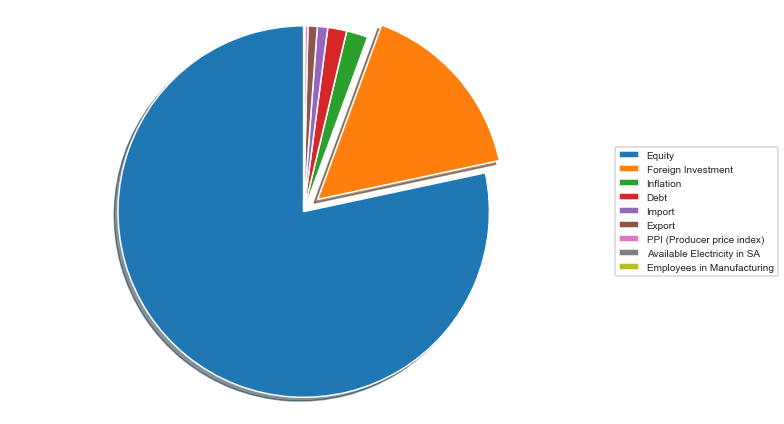

In [26]:
# Pie chart plot of average percentage of change over the years (1993-2018)
labels = ['Equity','Foreign Investment','Inflation','Debt', 
          'Import','Export','PPI (Producer price index)',
          'Available Electricity in SA','Employees in Manufacturing']
sizes = [6.121237, 1.254267, 0.146432, 0.128822, 0.070511, 0.063311, 0.021023, 0.007196, 0.000111]
#sizes = [12.214430, 9.567751, 0.904439, 0.859564, 0.362525, 0.300305, 0.154556, 0.057949, 0.054997 ]
# only "explode" the 2nd slice 
explode = (0, 0.1, 0, 0, 0, 0,  0, 0, 0)  

fig1, ax1 = plt.subplots(figsize = (11,6))
ax1.pie(sizes, explode=explode,shadow=True, startangle=90,textprops={'fontsize': 10},labeldistance=None)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax1.legend(labels=labels,bbox_to_anchor=(1,0.5),loc="center left", prop={'size': 10});

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.tight_layout()
plt.show()

###  4.3 Interpretation of correlation matrix

- Pairs of variables that have correlation coefficients close to -1 are strongly uncorrelated.

- Pairs of variables that have correlation coefficients closer to 1 are highly correlated.

The variables with low correlation to Manufacturing GDP indicated by the matrix bellow are :
- `Employees in Manufacturing` 
- `PPI (Producer Price Index)` 
- `Inflation` 
- `Equity` 

On the other hand the variables with highest degree are :

- `Available Electricity in SA`
- `Export Goods`
- `Import Goods`
- `Debt`
- `(Exported - Imported) Electricity in SA`

The variables with a positive relationship, leading to us to understand that the variation or change that happens in one of the variables has a significant impact on the other, in this case Manufacturing GDP is affected by export and import of goods as well as the amount of foreign Debt allow the country of SA to move in a positive direction. In contrast the variable `(Exported - Imported) Goods in SA` is considered to be strongly uncorelated, this signifies that when the two variables (independent and dependent) tend to move, they move in opposite direction, such that when one increases the other variable decreases.

#### 4.3.1 Plot of correlation matrix

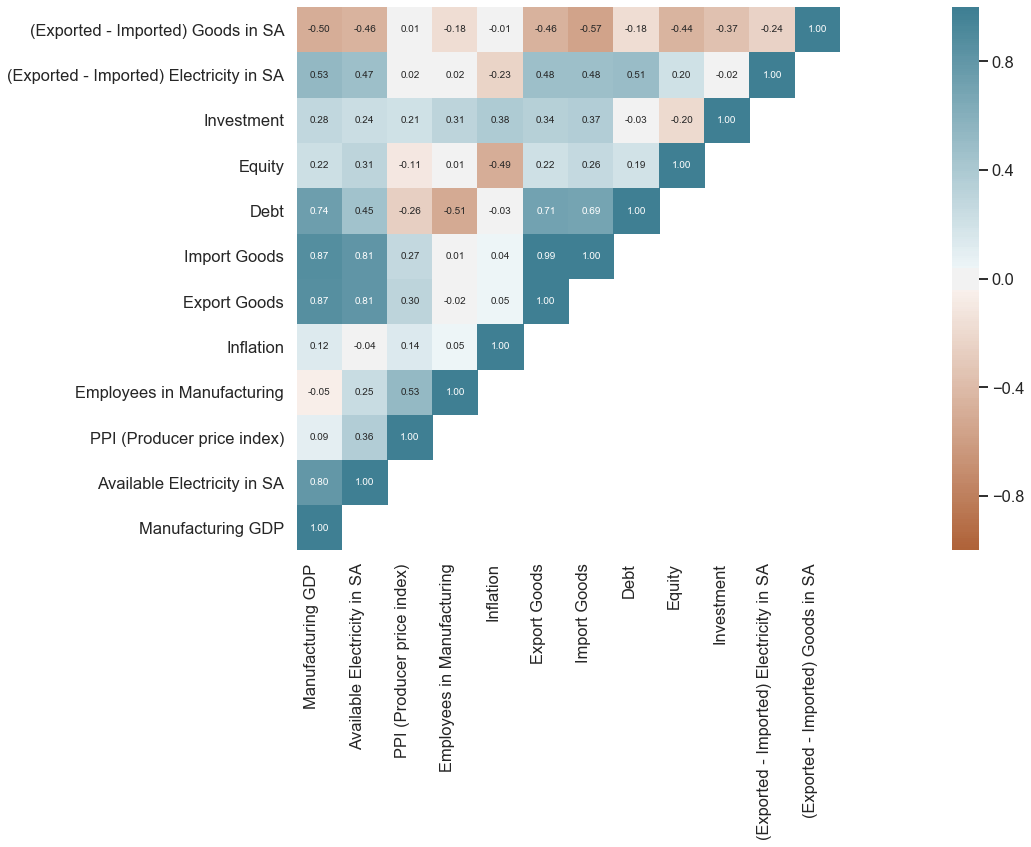

In [27]:
# Correlation matrix of average percentage of change over the years (1993-2018)
corr = data.corr()
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool)) # print but half the correlation matrix

plt.figure(figsize=(40, 10))
plt.xlabel(" Factors that affect GDP ")
plt.ylabel(" Factors that affect GDP ")

ax = sns.heatmap(df_lt, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(30, 220, n=200),square=True, annot=True, fmt=".2f")
ax.set_ylim([0,12])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');

In [28]:
#retrieving the pairs with highest correlation pair
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.4]

print('Strongest Relationships (absolute value greater than  0.4) : \n')
print(strong_pairs['Manufacturing GDP'])

Strongest Relationships (absolute value greater than  0.4) : 

(Exported - Imported) Goods in SA         -0.495119
(Exported - Imported) Electricity in SA    0.533659
Debt                                       0.735074
Available Electricity in SA                0.796148
Export Goods                               0.866191
Import Goods                               0.872533
Manufacturing GDP                          1.000000
dtype: float64


<a id='part6'></a>

## 5. Model Fitting :

This section of the notebook will discuss the models that were utilized in this project similarly it will allow the reader to replicate the study if this notebook is running on a different machine. Statistical models are useful tools applied in many fields of research that are dealing with empirical data, in the case for this project the variable selection method allows to select the best set of variables for the model to be discovered. 



### 5.1 Understanding projects Methodology 

This research utilized the method of forward selection that is a type of stepwise regression which starts with an empty model and in each iteration, it adds variables one at a time to the create a new model. On the other hand, backwards selection works in the opposite direction by starting with all the variables and decreasing the number of variables in the model. Each variable that is qualified for the new model is selected given an criteria and for this project $R^{2}$ was the intended criteria, given by the expression below :

$$R_{}^{2}=1-\frac{\hat{\sigma}_{\text {model }}^{2}}{\hat{\sigma}_{\text {null }}^{2}}$$

The goal of this criteria is to have a model minimizing the standard error for prediction which in term means minimizing $\sigma^{2}$.For more understanding, the code for both forward and backward implementation is presented in the cells bellow in the Modeling results section.


### 5.2 Reasonable Assumptions

One reasonable assumption is that more data would yield a better result, altought this is not always considered to be true it was evident in the previous section that some variables with a higher degree of colinearity exist. Another worth mentioning point is that while processing the data frame for this section there was a realization of missing data points in the `Export` and `Import` variables, for this reason in this section there was a reduction in the number of rows from 107 to 75, thus not accounting for last 3 data points with missing data. 

The sense check done in the previous part of the project, allowed to avoid missing values by not reading the last 3-4 rows and only working with the available quarterly values. On this last part of the project, the most notable sense check performed was on identifying outliers during the hypothesis testing section, but given that there is no expectation of duplicate points to be present while joining the tables the assumption going forward is that the dataset is already pre-processed and ready to start with the data split section bellow.

### 5.3 Data Splitting and VFI (Variance inflation factor) elimination

Initially, there are 11 independent variables with 75 observations each, but before building a model it is best to check colinearity of the data, and one approach is utilizing VFI or Variance inflation factor [Analyticsvidhya](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/). Colinearity problem is not harmful to our model but it assists us to understand data redundancy. 

To prevent this feature engineering is applied, this can be a combination or the difference between two variables, and in this project's case, the variables `Import` and `Export` alone may not give meaningful information but the difference between the two may give us a better understanding of how much one country depends on the other. 

In [29]:
data = pd.DataFrame(data={'Manufacturing':ManufacturingGdp[29:-3].values,
                        'Electricity':availableSA[29:-3], 
                        'PPI':ppiSA[29:-3],  
                        'Employees':empRealSA,
                        'Inflation':inflationSA[29:-3],
                        'Export':exportSA[29:-3],
                        'Import':importSA[29:-3],  
                        'Debt':debtSA[29:-3],
                        'Equity':equitySA[29:-3],
                        'Investment':ForeigninvestmentSA[29:-3],
                        'DifferenceElectricity':exportedbySA[29:-3] - importedtoSA[29:-3],
                        'DifferenceExportImport':exportSA[29:-3] - importSA[29:-3]
                         },
                        index=ManufacturingGdp[29:-3].index, dtype=np.float64)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = data.drop(['Manufacturing'], axis=1).copy()
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

/Users/neilfabiao/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,Electricity,745.128847
1,PPI,34.144607
2,Employees,570.606400
3,Inflation,10.763215
4,Export,inf
5,Import,inf
6,Debt,28.025717
7,Equity,4.407748
8,Investment,6.596636
9,DifferenceElectricity,4.267917


In [31]:
# VIFS after eliminating Import and Export 
df = df.drop(['Import','Export'], axis=1)
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,features,VIF Factor
0,Electricity,614.710310
1,PPI,14.407629
2,Employees,486.479383
3,Inflation,10.350034
4,Debt,11.760476
5,Equity,4.399199
6,Investment,5.127230
7,DifferenceElectricity,4.260055
8,DifferenceExportImport,1.856665


In [32]:
#copy of original data for later use in hyphotesis testing with all the variables
dataraw = data.copy()

In [33]:
#droping import and export after vfi analises 
data = data.drop(['Import','Export'], axis=1)

After the colinearity issue solved the data is now divided into testing and exploration data, the exploration data is the variable named `hyphotesis_test_testDf` and the testing data is named `regression_trainDf`. As instructed for the purpose of this project the data split choosen is 30 random indicies out of 75 for exploration and the other 45 for testing. 

`Note : regression_trainDf, hyphotesis_test_testDf = train_test_split(data, test_size=0.4, random_state=25)`




In [34]:
#data splitting where 30 random points for exploration and 45 random poitns for testing
regression_trainDf, hyphotesis_test_testDf = train_test_split(data, test_size=0.4, random_state=25)

### 5.4  Model fitting with all the varaibles

Initially, for testing purposes, the first model will include all the variables in the data frame and the summary of this model is presented below. From this first general model it is possible to understand that the adjusted R squared is 0.851 leading to conclude that 85% of the total variation of Manufacturing GDP in South can be explained by the all of the independent variables in the project.

In [35]:
#modeling with all the variables in the dataset to understand the possible results
model = ols('Manufacturing ~ Electricity + PPI + Employees + Inflation + Debt + Equity + Investment + DifferenceElectricity + DifferenceExportImport',regression_trainDf).fit()

print_model = model.summary()
print('✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Fitting, and Description ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎')
print('\n')
print(print_model)

✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Fitting, and Description ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎


                            OLS Regression Results                            
Dep. Variable:          Manufacturing   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     27.68
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.31e-13
Time:                        16:10:07   Log-Likelihood:                -425.47
No. Observations:                  45   AIC:                             870.9
Df Residuals:                      35   BIC:                             889.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err        

#### 5.4.1 Forward and backward selection results

Both backwards and forwards selection presented two different sets of formulas that are presumed to have variables that mostly affect the variation in the manufacturing GDP. The common variables in both selection methods are electricity availability, foreign debt in stocks, inflation, different in Exportation and importation of goods and difference in exported and imported electricity in South Africa.

The model with the highest $R^2$ value using training data was forward selection with 0.85, but the model that presented the highest $R^2$ value when fitting the model with testing data was backward selection with 0.88, and although  the best model can be considered to be backwards selection, the model that yielded a more adjusted variation in P-value and t-test was forward selection. To confirm if the models are correct the appropriateness of the models will be judged by understanding the hyphotesis testing in addition to the regression and residual plots in the following sections of the notebook.

In [36]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns) # get all columns from the data (list of all possible regressors)
    remaining.remove(response) # Remove the regressand from the list
    selected = [] # Holding variables for best score of any model and the current model's score
    current_score, best_new_score = 0.0, 0.0 # Mix scores for the regression models
    while remaining and current_score == best_new_score: # While there are unused regressors and our current model is the best
        scores_with_candidates = [] # Empty list to hold a tuple of scores with the indiviually removed regressors for the model
        for candidate in remaining:# Loop through all potentially regressors variables
            formula = "{} ~ {} + 1".format(response, # Obtain the regression formula where 1 is the bias
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj #obtain the R2 value for current model
            scores_with_candidates.append((score, candidate)) # Append the regressor removed and its R2 value
        scores_with_candidates.sort() #Sort the list of best candidate regressors and their R2 value
        best_new_score, best_candidate = scores_with_candidates.pop() #adding the best scores and the best regressor variables 
        if current_score < best_new_score: # If removing a regressor makes the model better than our current model
            remaining.remove(best_candidate)# Select the best regressor to add
            selected.append(best_candidate)
            current_score = best_new_score # The new model is now our current model
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()# Fit this best model
    return model # Return this best model

In [37]:
def backward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns) # get all columns from the dataset
    remaining.remove(response) # Remove the regressand from the list
    current_score, best_new_score = 1000000.0, 1000000.0  # Max scores for the regression models
    while remaining and current_score == best_new_score: # While there are unused regressors and our current model is the best
        scores_with_candidates = [] # Empty list to hold a tuple of scores with the indiviually removed regressors for the model
        candidates = remaining.copy() # Create a copy to remove from to try new regressions
        for candidate in remaining: # Loop through all remaining potentially removable regressors
            candidates.remove(candidate) # Remove the candidate regressor
            formula = "{} ~ {} + 1".format(response, # Obtain the regression formula where 1 is the bias
                                           ' + '.join(list(candidates))) 
            score = ols(formula, data).fit().rsquared_adj #obtain the R2 value for current model
            scores_with_candidates.append((score, candidate)) # Append the regressor removed and its R2 value
            candidates = remaining.copy() # Next regression must start with full set of regressors so only one regressor is removed at a time
        scores_with_candidates.sort() # Sort the list of candidate regressors and their R2 value
        best_new_score, best_candidate = scores_with_candidates.pop() # Get the best removable regressor 
        if current_score > best_new_score: # If removing a regressor makes the model better than our current model
            remaining.remove(best_candidate) 
            current_score = best_new_score # The new model is now our current model
    formula = "{} ~ {} + 1".format(response, # Get the formula for the chosen optimal model
                                   ' + '.join(remaining))
    model = ols(formula, data).fit() # Fit this best model
    return model # Return this best model

In [38]:
#using data after feature enginnering to model using forward selected features 
modelforward = forward_selected(regression_trainDf, 'Manufacturing')#testing data
modelforwardformula = modelforward.model.formula
print('The formula for forward selection using the training data is:\n',modelforwardformula)
print('The R squared for for training data is:',modelforward.rsquared_adj)

print('\n')
modelforward_test = ols(modelforwardformula,hyphotesis_test_testDf).fit()
print('The formula for testing data remains the same thus:')
print('The R squared for the testing data is:',modelforward_test.rsquared_adj)
print('✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Fitting, and Description ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎')
modelforward_test.summary()

The formula for forward selection using the training data is:
 Manufacturing ~ Electricity + Debt + Inflation + DifferenceElectricity + DifferenceExportImport + 1
The R squared for for training data is: 0.8555830162580587


The formula for testing data remains the same thus:
The R squared for the testing data is: 0.8520917100051392
✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Fitting, and Description ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Manufacturing   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     34.41
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.43e-10
Time:                        16:10:07   Log-Likelihood:                -286.98
No. Observations:                  30   AIC:                             586.0
Df Residuals:                      24   BIC:                             594.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                408.6448   1.27e+04      0.032      0.975   -2.58e+04    2.66e+04
Electricity                1.3482      0.229      5.887      0.000       0.876       1.821
Debt                    5.663e-08   9.91e-09      5.713      0.000    3.62e-08    7.71e-08
Inflation               2521.4517   1563.522      1.613      0.120    -705.499    5748.402
DifferenceElectricity      0.1285      1.435      0.090      0.929      -2.833       3.090
DifferenceExportImport -1.302e-07   5.41e-08     -2.407      0.024   -2.42e-07   -1.86e-08
==============================================================================
Omnibus:                        3.111   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.115
Skew:                           0.459   Prob(JB):                        0.347
Kurtosis:                       2.079   Cond. No.                     2.83e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#using data after feature enginnering to model using backward selected features 
modelback = backward_selected(regression_trainDf, 'Manufacturing')#training data
modelbackformula = modelback.model.formula
print('The formula for forward selection using the training data is:\n',modelbackformula)
print('The R squared for for training data is:',modelback.rsquared_adj)

print('\n')
modelback_test = ols(modelbackformula,hyphotesis_test_testDf).fit()#testing data
print('The formula for testing data remains the same thus:')
print('The R squared for the testing data is:',modelback_test.rsquared_adj)
print('✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Fitting, and Description ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎')
modelback_test.summary()

The formula for forward selection using the training data is:
 Manufacturing ~ PPI + Equity + Employees + Debt + DifferenceExportImport + Inflation + DifferenceElectricity + Electricity + 1
The R squared for for training data is: 0.8492927196991897


The formula for testing data remains the same thus:
The R squared for the testing data is: 0.8820140832038991
✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Fitting, and Description ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Manufacturing   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     28.10
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.54e-09
Time:                        16:10:08   Log-Likelihood:                -281.59
No. Observations:                  30   AIC:                             581.2
Df Residuals:                      21   BIC:                             593.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.582e+04   2.35e+04      1.521      0.143   -1.31e+04    8.48e+04
PPI                       27.8997      9.863      2.829      0.010       7.389      48.410
Equity                 -7.727e-09   5.05e-08     -0.153      0.880   -1.13e-07    9.73e-08
Employees                 -0.0012      0.011     -0.117      0.908      -0.023       0.021
Debt                    8.147e-08    1.3e-08      6.252      0.000    5.44e-08    1.09e-07
DifferenceExportImport -2.925e-07   7.64e-08     -3.830      0.001   -4.51e-07   -1.34e-07
Inflation               2206.9814   1515.955      1.456      0.160    -945.620    5359.583
DifferenceElectricity      1.7605      1.433      1.229      0.233      -1.219       4.740
Electricity                0.5032      0.348      1.447      0.163      -0.220       1.226
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.092
Skew:                           0.647   Prob(JB):                        0.351
Kurtosis:                       3.006   Cond. No.                     5.92e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='part7'></a>

### 6. Hyphotesis testing


"Based on an assumption, we compute the probability of an apparent effect" this is considered the p-value and if the p-value is low, we conclude that the null hypothesis is unlikely to be true. On the other hand, there is test statistic or t-test that is used to understand if there is a significant difference between the means of two groups. The hypothesis test for this research will be understanding the p-value and t statistic from the ordinary least squares regression done in the previous section.

####  6.1 Methodology

The hypothesis testing methodology of this research will be evaluating the regression models based on the p-value. If a given regression model has a p-value below 0.05 and t-test greater than p-value the null hypothesis will be deemed acceptable and we thus reject alternative hypothesis while a model with a p-value value above 0.05 we reject the null hypothesis and accept the alternative assumption.


The null hypothesis and alternative assumption for this project are the following :

- The present variables (ie electricity or debt) do not affect Manufacturing GDP.
- The present variables (ie electricity or debt) have a significant effect on Manufacturing GDP.



It is assumed that p-value and the t-test to be considered appropriate statistical tests, given that the model was created using ordinary least squares regression. The primary objective is to understanding if two variables one dependent and the other independent have any apparent effect over one another and these two statistics compare either the mean or the variation of two distributions. The data is assumed to not have any outliers but a sense check will be performed in this section before starting the hypothesis test calculations.


#### 6.2 Hypothesis Test Calculations

In this section, the calculation of p-value and t-test will be done and this will allow reaching a further conclusion to answering the main research question. The cell bellow checks if our data for this section has outliers using two methods namely cooks distance and z score before starting the hypothesis testing. 

In [40]:
#selecting variables in both forward and backward selection and verifying if there are outliers
m = ols('Manufacturing ~ Electricity + PPI + Employees + DifferenceElectricity + DifferenceExportImport + Inflation + Investment + Debt + Equity',hyphotesis_test_testDf).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()

if len(hyphotesis_test_testDf[sm_fr['cooks_d'] < 1.0]) == len(hyphotesis_test_testDf):
    print('No outliers')
else: 
    print('Okay there are outliers')

No outliers


The hyphotesis test model for the backward selection presentes the following results :

In [41]:
#hyphotesis testing using backward selection formula
predictions = modelback_test.predict(hyphotesis_test_testDf)

b = mean_squared_error(hyphotesis_test_testDf['Manufacturing'], predictions)  
c = mean_absolute_error(hyphotesis_test_testDf['Manufacturing'], predictions)
print('✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Hyphotesis testing ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎')
print('\n')
print('The adjusted R squared value for the model', modelback.rsquared_adj)
print('The Mean Squared Error (MSE) for this model is :',b)
print('The Mean abosolute error is:',c)
test_stat = modelback_test.tvalues[0]
p_value = modelback_test.pvalues[0]

print('test_stat: ',test_stat)
print('p_value: ',p_value)
print('\nConclusion:')
#the extra constraint given of test stat higher than p value was taken from the book introduction to data science
if p_value > 0.05 and test_stat > p_value:
    print('Null hyphotesis is reject and accept the alternative assumption')
    print('The present variables (ie electricity or debt) have a significant effect on Manufacturing GDP.')
else:
    print('Null hyphotes is accepted')
    print('The present variables (ie electricity or debt) do not affect Manufacturing GDP.')

✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Hyphotesis testing ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎


The adjusted R squared value for the model 0.8492927196991897
The Mean Squared Error (MSE) for this model is : 8324992.321222254
The Mean abosolute error is: 2291.984604120379
test_stat:  1.5213200459263028
p_value:  0.1430952687221643

Conclusion:
Null hyphotesis is reject and accept the alternative assumption
The present variables (ie electricity or debt) have a significant effect on Manufacturing GDP.


#### 6.3 Best model of the project

The best model for this research using ordinary least squares and passing the hypothesis test comes from forward feature selection and is displayed bellow :

$ Note: \beta_1  (Electricity) $ = $\beta_1 *(Electricity)$ 

$$
   \therefore{} ManufacturingGDP = \beta_0 + \beta_1  (Electricity) + \beta_2 (Debt)  
    + \beta_3 (Inflation) + \beta_4 (DifferenceElectricity)
    + \beta_5 (DifferenceExportImport)
$$

- $\beta_0$ - 1.342e+04
- $\beta_1$ - 1.1156
- $\beta_2$ - 6.761e-08
- $\beta_3$ - 2527.8429
- $\beta_4$ - 0.4380
- $\beta_5$ - 2.417e-07


This model yields :
- p-value of `0.9746141187734654` 
- test stat of ` 0.03215531211699297` 
- MSE (mean squared error) of `0.8555830162580587`   


In [42]:
#hyphotesis testing using forward selection formula
predictions = modelforward_test.predict(hyphotesis_test_testDf)

b = mean_squared_error(hyphotesis_test_testDf['Manufacturing'], predictions)  
c = mean_absolute_error(hyphotesis_test_testDf['Manufacturing'], predictions)

print('✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Hyphotesis testing ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎')
print('\n')
print('The adjusted R squared value for the model:', modelforward.rsquared_adj)
print('The Mean Squared Error (MSE) for this model is :',b)
print('The Mean Abosolute Error (MAE) for this model is:',c)
test_stat = modelforward_test.tvalues[0]
p_value = modelforward_test.pvalues[0]

print('test_stat: ',test_stat)
print('p_value: ',p_value)
print('\nConclusion:')
#the extra constraint given of test stat higher than p value was taken from the book introduction to data science
if (p_value >= 0.05) and (test_stat >= p_value):
    print('Null hyphotesis is reject and accept the alternative assumption')
    print('The present variables (ie electricity or debt) have a significant effect on Manufacturing GDP.')
else:
    print('Null hyphotes is accepted')
    print('The present variables (ie electricity or debt) do not affect Manufacturing GDP.')

✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎ Outputs of Model Hyphotesis testing ✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎✡︎


The adjusted R squared value for the model: 0.8555830162580587
The Mean Squared Error (MSE) for this model is : 11927189.877660502
The Mean Abosolute Error (MAE) for this model is: 2941.0608358159566
test_stat:  0.03215531211699297
p_value:  0.9746141187734654

Conclusion:
Null hyphotes is accepted
The present variables (ie electricity or debt) do not affect Manufacturing GDP.


<a id='part8'></a>

### 7 Regression Plots

Regression plots allow us to understand the positive and negative relationship that exists between the dependent and independent variables, while some of the variables do not present a clear relationship in the plots, statistical test or hypothesis test are deemed the best indicator of their influence in the dependent variable. The variables that will be taken into account in the regression plot are all the variables that were present in the formula for forward and backward selection. Given that said the variables that present a positive relationship with Manufacturing GDP according to the plots bellow were :

- Electricity 
- Difference between Exported and Imported Electricity 
- Foreign Debt
- Equity

On the other hand, the variable that has a negative relationship with Manufacturing GDP is  Difference between Exported and Imported Goods. This interpretation from the regression plots leads to the conclusion that the variables that have a positive relationship with the Manufacturing Gdp have a predominant effect on the outcome for future years while the variable with a negative relationship in this case Difference between exported and imported goods is essential for the sustainability of South African manufacturing sector. 

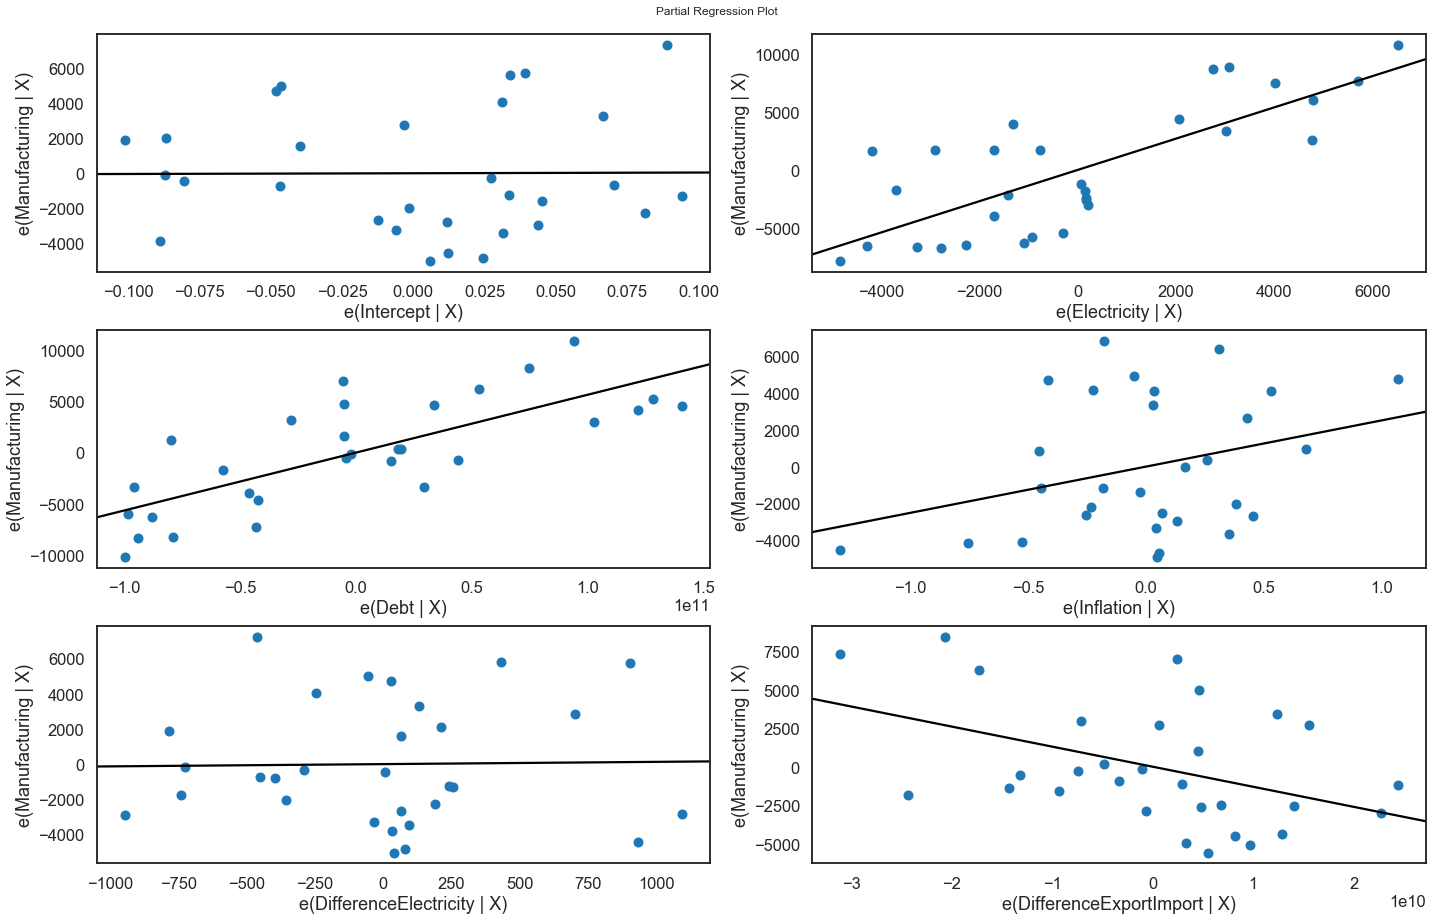

In [43]:
#Regression plot of the best model (forward selection)
fig = plt.figure(figsize=(20,13))
fig = sm.graphics.plot_partregress_grid(modelforward_test, fig=fig) #partial regression plot for the model

<a id='part9'></a>
### 8 Residual Analysis 

Residual analysis is performed in order to further test the assumption that a relationship between the dependent and independent variables exists when regression analysis is done, and reasoning to performs this analyis is to understand if regression models are correct.  With the residual plots for this project have a variation of the residual data points within a particular range of 4000 to -4000. 

According Statistics Solutions :

`Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.`

Given that this is apparent in some of the plots bellow we can accept that the regression model has correct assumptions for the following variables :

- Avaliable electricity 
- Foreign Debt
- Difference between export and import of goods
- Difference between exported and imported electricity
- Equity 
- Inflation
- PPI

On the other hand, the plot of residual for the number of employees, foreign debt and inflation displayed that is displayed bellow may be considered acceptable given that the best fit line is at 0 in the y-axis, however, there is the presence of outliers and some clusters formed in the plot.

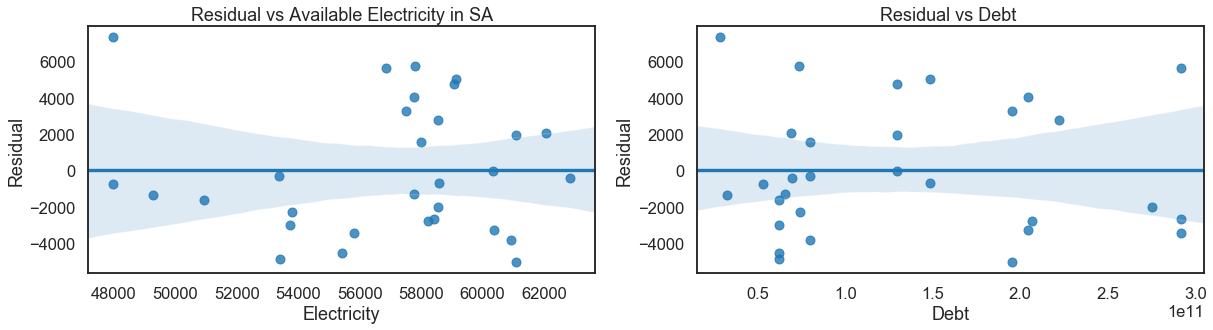

In [44]:
#residual plot of the avaliable electricity and debt
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['Electricity'], fit_reg=True)
plt.ylabel('Residual')
plt.title('Residual vs Available Electricity in SA');

plt.subplot(2, 2, 2)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['Debt'], fit_reg=True)
plt.ylabel('Residual')
plt.title('Residual vs Debt ')
plt.show();

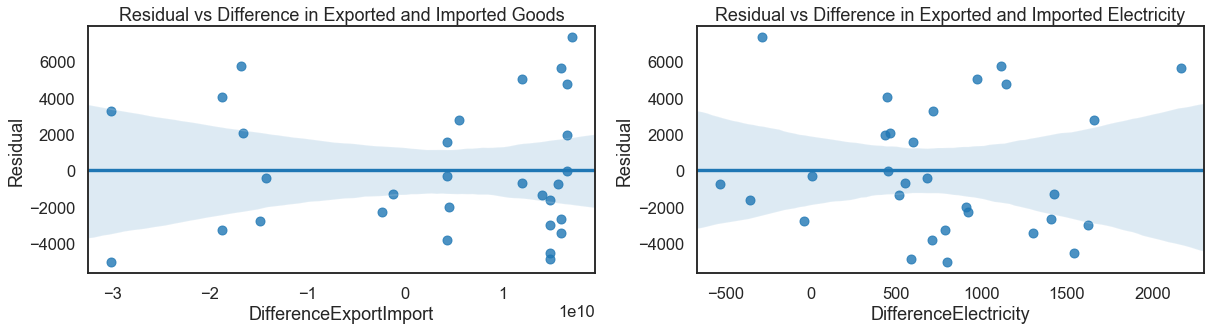

In [45]:
#residual plot of the avaliable Difference in exported and imported goods 
#and Difference in exported and imported electrity
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['DifferenceExportImport'], fit_reg=True)
plt.ylabel('Residual')
plt.title('Residual vs Difference in Exported and Imported Goods')


plt.subplot(2, 2, 2)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['DifferenceElectricity'], fit_reg=True)
plt.ylabel('Residual')
plt.title('Residual vs Difference in Exported and Imported Electricity')

plt.show();

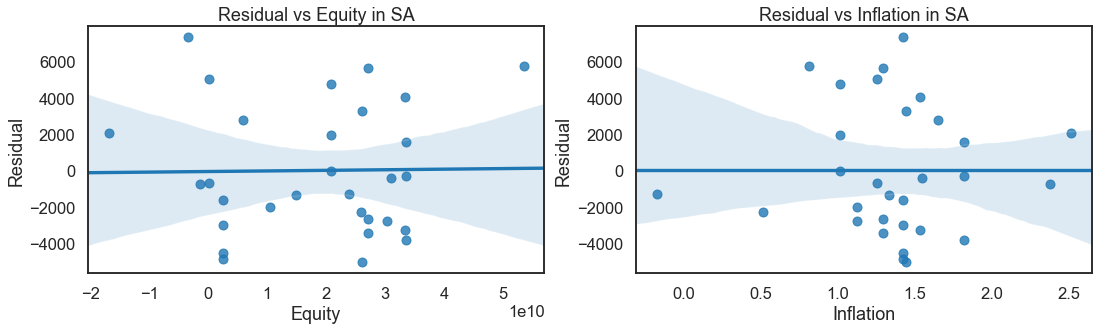

In [46]:
#residual plot of the Equity and inflation
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['Equity'], fit_reg=True)
plt.ylabel('Residual')
plt.title('Residual vs Equity in SA')

plt.subplot(2, 2, 2)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['Inflation'], fit_reg=True)
plt.ylabel('Residual')
plt.title('Residual vs Inflation in SA')

plt.show();

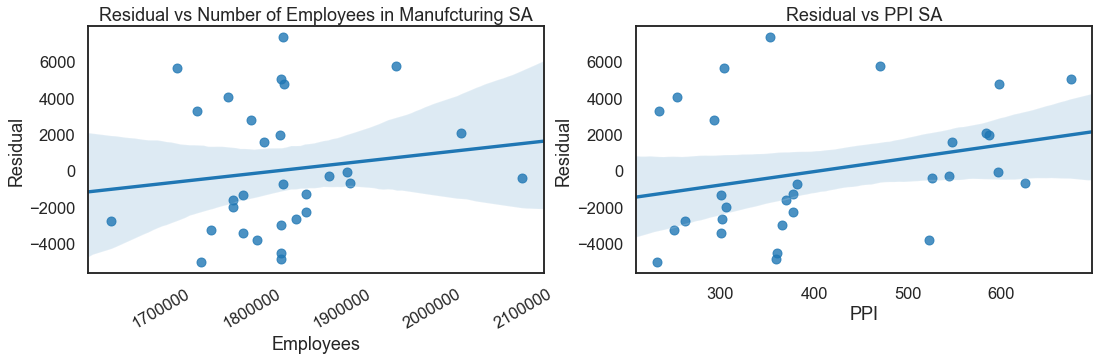

In [47]:
#residual plot of the PPI in SA and number of employees in manufacturing 
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['Employees'], fit_reg=True)
plt.xticks(rotation=30)
plt.ylabel('Residual')
plt.title('Residual vs Number of Employees in Manufcturing SA')

plt.subplot(2, 2, 2)
sns.regplot(y=modelforward_test.resid.values, x=hyphotesis_test_testDf['PPI'], fit_reg=True)
plt.ylabel('Residual')
plt.title('Residual vs PPI SA');

<a id='part10'></a>
### 9. Conclusion 

The questions and answers for this research after understanding the best model presented on the previous section can be summarised as follows :

- `What factors affect the South African Manufacturing GDP ?` According to the model and after hypothesis testing the factors that affect the South African Manufacturing GDP are foreign debt, inflation, the difference in exported and imported electricity and lastly difference in export and import Goods. 

- `Does the variation in Export and Import of Goods affects the manufacturing GDP ?` Yes, it was possible to understand that the difference in the amount of exportation and importation affects South African manufacturing GDP. The regression plot made it possible to see that there may be a negative relationship between the two variables, which in turn signifies that the importation of products is on the rise and export of goods sustainability is in decline.
- `Will the decreasing number of employees affect South Africa manufacturing industry? ` The number of employees does not affect the South African Manufacturing GDP and this may be the consequence of technological advancements in recent years.
- `Is electricity availability affecting the South African manufacturing GDP ?` With the model and hypothesis test, it was evident that electricity availability affects the Manufacturing GDP and that the amount of electricity imported and exported also played a great role in this analysis. 

The results from the research exceeded the initial expectation, given that this research is based on [Factors Affecting GDP (Manufacturing, Services, Industry): An Indian Perspective Dhiraj Jain, K. Sanal Nair and Vaishali Jain](https://www.scmspune.ac.in/chapter/Chapter%203.pdf) , in the Indian perspective the variables that impacted the Manufacturing GDP were :
- FDI (Foreign Direct Investment)
- Net FII (Foreign institutional investment) in equity
- Net FII (Foreign institutional investment) in Debt
- Import and Export of goods

On this research, the similar variables were foreign debt, and Export and Import Goods. This lead to an understanding that for the country of South Africa the foreign direct investment and equity may not play a great role in the variation of manufacturing GDP. In addition to this, electricity availability and inflation were not expected to be influential but were deemed important for the model and variation of manufacturing GDP. 

Given that the available data presented almost similar conclusion to the work done in the Indian perspective, it is save to conclude that the quality of the data for this project is in line with normal standards and what is presented on the website. On the other hand for the assumptions that electricity availability does not have inherent effects on the variation of manufacturing GDP, it was proved to be false given that the testing methodology leads to conclude that the model mentioned as one of the variables that have an inherent effect on the Manufacturing GDP.

Suggestion for future students is to acquire more data and new variables to provide new insights, test different modelling selection techniques and having actual quarters for some of the years not provided by the OECL. All in all this model makes it understandable that if there is an increase in productivity and the services necessary in the world that being technology or any other, there is an increasing probability of learning from this experience and to navigate in the event of another pandemic.

# References:

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html source accessed 8 of May 2020 0:18

PennState: Statistics Online Courses. 2020. 1.9 - Hypothesis Test For The Population Correlation Coefficient | STAT 501. [online] Available at: <https://online.stat.psu.edu/stat501/lesson/1/1.9> [Accessed 13 April 2020].

Allen B. Downey. 2011. Think Stats. O’Reilly Media, Inc.

Gonese, Dorcas & Hompashe, Dumisani & Sibanda, Kin. (2019). The impact of electricity prices on sectoral output in South Africa from 1994 to 2015. African Journal of Economic and Management Studies. 10.1108/AJEMS-12-2017-0305.

Kouki, Mondher & Belhadj, Rym & Chikhaoui, Monia. (2017). Impact of Financial Crisis on GDP Growth: The Case of Developed and Emerging Countries. International Journal of Economics and Financial Issues(ISSN: 2146-4138). vol 7. 212-221. 

Africa, S., 2020. Manufacturing: Winners And Losers Of 2018 | Statistics South Africa. [online] Statssa.gov.za. Available at: <http://www.statssa.gov.za/?p=11890> [Accessed 10 March 2020].

Minitab Blog Editor (2015). Understanding Hypothesis Tests: Significance Levels (Alpha) and P values in Statistics. [online] Minitab.com. Available at: https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics.

Statistics Solutions. (2013) Homoscedasticity - Statistics Solutions. In: Statistics Solutions. https://www.statisticssolutions.com/homoscedasticity/. Accessed 4 Jun 2020

